In [1]:
##Carregar Pacotes#####

library(ggplot2)
library(readxl)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
✔ purrr   0.3.4      

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
##Carregar o dataset Data Science Job Salaries no software utilizado##

dados <- read.csv("https://raw.githubusercontent.com/renatoquiliche/DataScience-PUCRio-FB/main/Data/DS_salarios/ds_salaries.csv")

In [3]:
#gerar estatísticas descritivas#

mean(dados$salary_in_usd) # média dos salários em dólar

median(dados$salary_in_usd) # mediana dos salários em dólar

var(dados$salary_in_usd) # variância dos salários em dólar

summary(dados) #resumo de outras estatísticas

[1] 112297.9

[1] 101570

[1] 5034932663

       X           work_year      work_month     experience_level  
 Min.   :  0.0   Min.   :2020   Min.   : 1.000   Length:607        
 1st Qu.:151.5   1st Qu.:2021   1st Qu.: 4.000   Class :character  
 Median :303.0   Median :2022   Median : 6.000   Mode  :character  
 Mean   :303.0   Mean   :2021   Mean   : 6.473                     
 3rd Qu.:454.5   3rd Qu.:2022   3rd Qu.: 9.000                     
 Max.   :606.0   Max.   :2022   Max.   :12.000                     
 employment_type     job_title             salary         salary_currency   
 Length:607         Length:607         Min.   :    4000   Length:607        
 Class :character   Class :character   1st Qu.:   70000   Class :character  
 Mode  :character   Mode  :character   Median :  115000   Mode  :character  
                                       Mean   :  324000                     
                                       3rd Qu.:  165000                     
                                       Max.   :30400000       

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



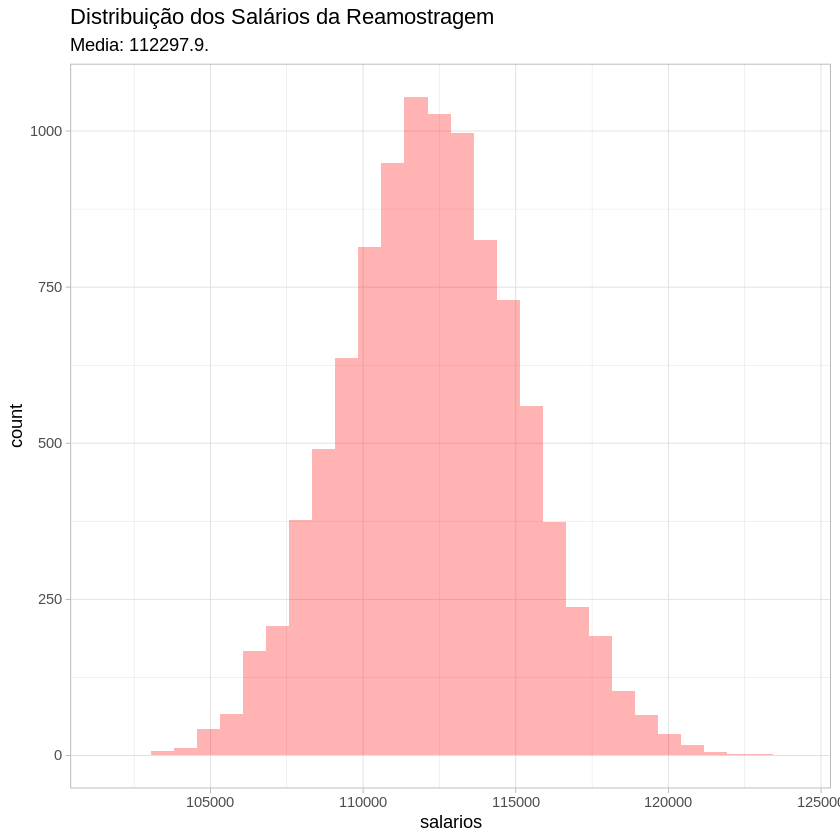

In [5]:
#------------------------------------------------------------------------#
#Aplicar uma técnica de amostragem (sugestão: aplicar bootstrap)#
#Bootstrapping é uma técnica de reamostragem para se realizar inferências sobre acurácia de estimativas por amostras. #


# Criar um vetor para armazenar o valor da reamostragem:
reamostras = rep(NA, 10000)

# Simular a reamostragem 10.000 vezes:
for (i in 1:10000) {
  reamostra = sample(dados$salary_in_usd, replace = T) # Reamostragem dos salários com reposição
  reamostras[i] = mean(reamostra) # Calcular a média de cada reamostra
}

# Transformar o vetor em formato tidy:
reamostras = data.frame(salarios = reamostras)

# Criar o gráfico de distribuição da média bootstrap:
reamostras  %>%
  ggplot(aes(x = salarios)) +
  geom_histogram(alpha = 0.3, fill = "red") +
  labs(
    title = "Distribuição dos Salários da Reamostragem",
    subtitle = paste0("Media: ", round(mean(dados$salary_in_usd),1),".")
  ) + 
  theme_light()

In [6]:
#------------------------------------------------------------------------#
#Aplicar uma técnica de discretização (sugestão: transformar variável numérica em quantiles)#

#Categorizar a coluna de salários em USD em faixas salariais#

dados$faixa_salarial<-rep(NA,length(dados$salary_in_usd))
summary(dados$salary_in_usd)
sd(dados$salary_in_usd,na.rm=T)
dados$faixa_salarial[dados$salary_in_usd<summary(dados$salary_in_usd)[2]]<-'Salario muito baixo'
dados$faixa_salarial[summary(dados$salary_in_usd)[2]<=dados$salary_in_usd&dados$salary_in_usd<summary(dados$salary_in_usd)[3]]<-'Salario baixo'
dados$faixa_salarial[summary(dados$salary_in_usd)[3]<=dados$salary_in_usd&dados$salary_in_usd<summary(dados$salary_in_usd)[5]]<-'Salario medio'
dados$faixa_salarial[dados$salary_in_usd>=summary(dados$salary_in_usd)[5]]<-'Salario alto'

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2859   62726  101570  112298  150000  600000 

[1] 70957.26

In [8]:
table(dados$faixa_salarial)


       Salario alto       Salario baixo       Salario medio Salario muito baixo 
                159                 152                 145                 151 

In [11]:
#------------------------------------------------------------------------#
#Aplicar uma técnica de Feature Engineering 
#(sugestão: aplicar uma funçao que transforme os campos de ano e mês na quantidade de meses transcorrido desde uma data inicial. Por exemplo, ano 2020/mês 6 representariam 30 meses de antiguidade)#

j = length(dados$salary_in_usd)
intervalo_meses<-c()
for(i in 1:j) {intervalo_meses[i]=(((dados$work_year[i]-1996)*12)+((12-5)+1)+((dados$work_month[i]-1)))}
dados$intervalo_meses
tail(dados)

NULL

,X,work_year,work_month,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,faixa_salarial
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
602,601,2022,7,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M,Salario muito baixo
603,602,2022,5,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Salario alto
604,603,2022,6,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Salario medio
605,604,2022,11,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,Salario medio
606,605,2022,2,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Salario alto
607,606,2022,3,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L,Salario alto


**Observations: this code is clear and it includes a visualization of bootstrap, the sample() function is ok to perform bootstrap on a single column. To use the bootstrap method for data-mining it would be helpfull to research other methods that can bootstrap an entire dataframe, as all the features will be required to train algorithms on re-sampled dataframes.**